## 範例重點
* 學習如何在 keras 中加入 EarlyStop
* 知道如何設定監控目標
* 比較有無 earlystopping 對 validation 的影響

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

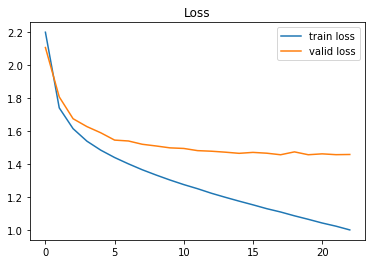

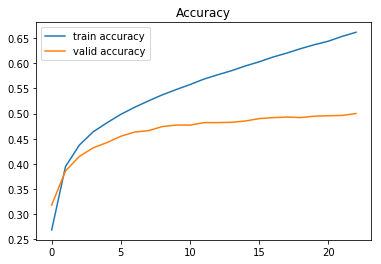

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [9]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ["Validation Accuracy","val_loss"]

In [14]:
results = {}
for mon in MONITOR:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    earlystop = EarlyStopping(monitor=mon, 
                              patience=5, 
                              verbose=1
                              )
    print("Experiment with  MONITOR = %s" % (str(mon)))
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
             callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-mon-%s" % (str(mon))
    print(exp_name_tag)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with  MONITOR = Validation Accuracy
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch 

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 124us/step - loss: 1.7531 - acc: 0.3886 - val_loss: 1.8201 - val_acc: 0.3758
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6217 - acc: 0.4337 - val_loss: 1.7230 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5437 - acc: 0.4625 - val_loss: 1.6379 - val_acc: 0.4227
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4881 - acc: 0.4833 - val_loss: 1.5937 - val_acc: 0.4490
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4407 - acc: 0.4986 - val_loss: 1.5767 - val_acc: 0.4464
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.4002 - acc: 0.5130 - val_loss: 1.5683 - val_acc: 0.4495
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3638 - acc: 0.5275 - val_loss: 1.5384 - val_acc: 0.4603
Epoch 9/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.2448 - acc: 0.2676 - val_loss: 2.1876 - val_acc: 0.2962
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7432 - acc: 0.3927 - val_loss: 1.7857 - val_acc: 0.3833
Epoch 3/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6168 - acc: 0.4356 - val_loss: 1.6912 - val_acc: 0.4080
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5418 - acc: 0.4590 - val_loss: 1.6347 - val_acc: 0.4240
Epoch 5/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.4862 - acc: 0.4782 - val_loss: 1.5929 - val_acc: 0.4410
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4394 - acc: 0.4938 - val_loss: 1.5773 - val_acc: 0.4476
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.4006 - acc: 0.5086 - val_loss: 1.5557 - 

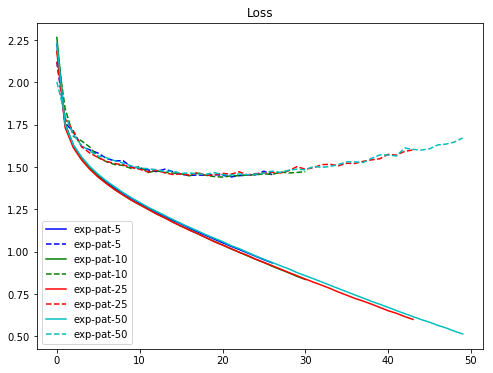

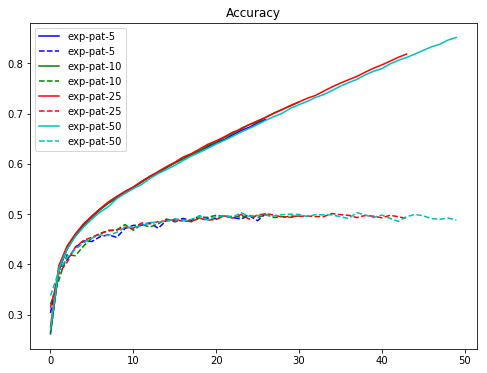

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [21]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR ="val_loss"
PATIENCE = [5,10,25,50]


In [19]:
results = {}
for pat in PATIENCE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    earlystop = EarlyStopping(monitor=MONITOR, 
                              patience=pat, 
                              verbose=1
                              )
    print("Experiment with  PATIENCE = %s" % (str(pat)))
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer,)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
             callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-pat-%s" % (str(pat))
    print(exp_name_tag)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with  PATIENCE = 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

50000/50000 [==============================] - 8s 155us/step - loss: 1.2774 - acc: 0.5529 - val_loss: 1.5025 - val_acc: 0.4678
Epoch 12/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.2515 - acc: 0.5638 - val_loss: 1.4674 - val_acc: 0.4791
Epoch 13/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.2249 - acc: 0.5742 - val_loss: 1.4776 - val_acc: 0.4742
Epoch 14/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2004 - acc: 0.5826 - val_loss: 1.4684 - val_acc: 0.4806
Epoch 15/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.1753 - acc: 0.5925 - val_loss: 1.4640 - val_acc: 0.4902
Epoch 16/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.1500 - acc: 0.6016 - val_loss: 1.4594 - val_acc: 0.4845
Epoch 17/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.1290 - acc: 0.6097 - val_loss: 1.4478 - val_acc: 0.4879
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 7s 148us/step - loss: 0.8973 - acc: 0.7008 - val_loss: 1.4645 - val_acc: 0.4983
Epoch 29/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8769 - acc: 0.7080 - val_loss: 1.4781 - val_acc: 0.4936
Epoch 30/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.8581 - acc: 0.7163 - val_loss: 1.5022 - val_acc: 0.4959
Epoch 31/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.8385 - acc: 0.7230 - val_loss: 1.4866 - val_acc: 0.4956
Epoch 32/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.8196 - acc: 0.7305 - val_loss: 1.4959 - val_acc: 0.4961
Epoch 33/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8018 - acc: 0.7359 - val_loss: 1.5140 - val_acc: 0.4950
Epoch 34/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.7827 - acc: 0.7447 - val_loss: 1.5159 - val_acc: 0.4950
Epoch 35/50
50000/50000 [==============

50000/50000 [==============================] - 7s 143us/step - loss: 0.8399 - acc: 0.7242 - val_loss: 1.5036 - val_acc: 0.4951
Epoch 33/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8209 - acc: 0.7320 - val_loss: 1.4979 - val_acc: 0.4989
Epoch 34/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8016 - acc: 0.7377 - val_loss: 1.5029 - val_acc: 0.4983
Epoch 35/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7823 - acc: 0.7458 - val_loss: 1.5148 - val_acc: 0.4985
Epoch 36/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.7634 - acc: 0.7542 - val_loss: 1.5304 - val_acc: 0.4944
Epoch 37/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7443 - acc: 0.7616 - val_loss: 1.5299 - val_acc: 0.49140.7436 
Epoch 38/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.7260 - acc: 0.7679 - val_loss: 1.5265 - val_acc: 0.5029
Epoch 39/50
50000/50000 [=======

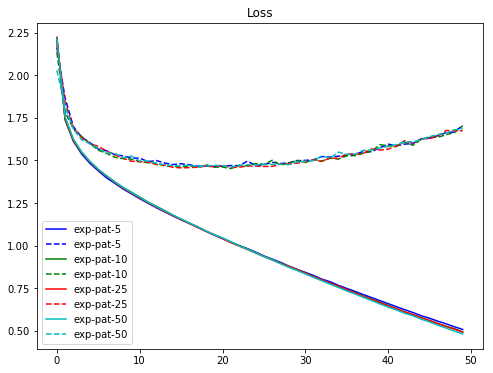

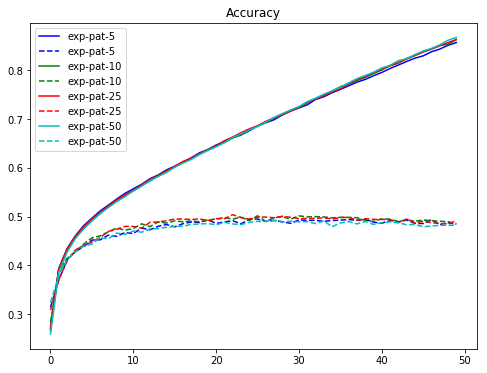

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()